Data Preparation

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("engine_data.csv")

df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [4]:
# check for null/NaN values in the data

print(df.isnull().values.any())

False


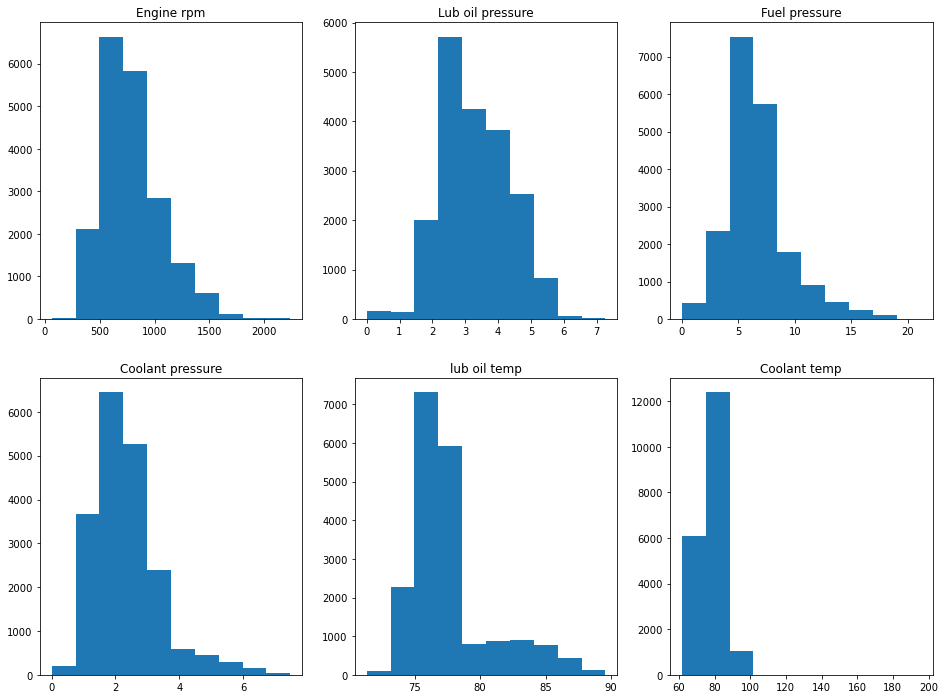

In [5]:
# visualize each column

plt.figure(figsize=(16,12))
for i in range(6):
    data = df.iloc[:, i]
    
    plt.subplot(2,3, i+1)
    plt.hist(data,)
    plt.title(df.columns[i])

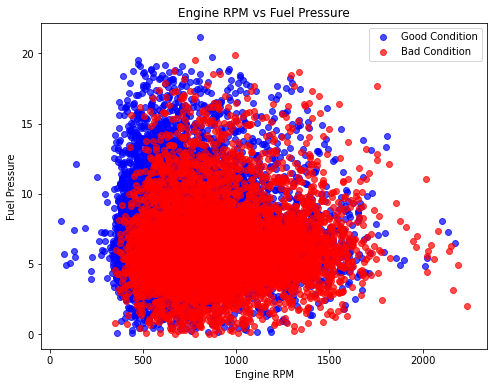

In [12]:
plt.figure(figsize=(8,6))

plt.subplot()
#Plot points where engine condition is "Good" (0)
plt.scatter(
    df[df['Engine Condition'] == 1]['Engine rpm'], 
    df[df['Engine Condition'] == 1]['Fuel pressure'], 
    color='blue', 
    label='Good Condition', 
    alpha=0.7
)

# Plot points where engine condition is "Bad" (0)
plt.scatter(
    df[df['Engine Condition'] == 0]['Engine rpm'], 
    df[df['Engine Condition'] == 0]['Fuel pressure'], 
    color='red', 
    label='Bad Condition', 
    alpha=0.7
)

# Add axis labels and title
plt.xlabel('Engine RPM')
plt.ylabel('Fuel Pressure')
plt.title('Engine RPM vs Fuel Pressure')

# Add legend to explain the color scheme
plt.legend()

# Show the plot
plt.show()

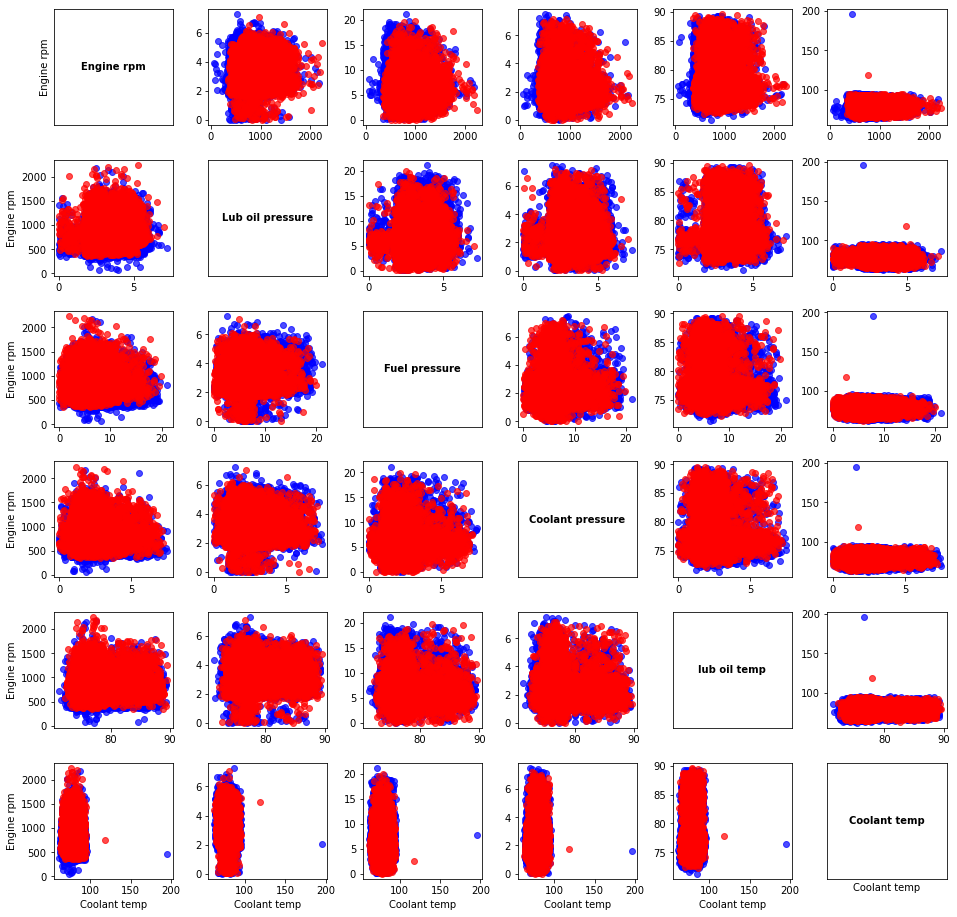

In [17]:
features = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']

num_features = len(features)
fig, axes = plt.subplots(num_features, num_features, figsize=(16, 16), sharex=False, sharey=False)


for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        if i != j:  # Avoid diagonal (self-vs-self) scatter plots
            ax = axes[i, j]
            # Good conditon
            ax.scatter(
                df[df['Engine Condition'] == 1][feature_x], 
                df[df['Engine Condition'] == 1][feature_y], 
                color='blue', 
                label='Good Condition', 
                alpha=0.7
            )
            # Bad condition
            ax.scatter(
                df[df['Engine Condition'] == 0][feature_x], 
                df[df['Engine Condition'] == 0][feature_y], 
                color='red', 
                label='Bad Condition', 
                alpha=0.7
            )
        else:
            # For diagonal plots, display the feature name
            ax = axes[i, j]
            ax.text(0.5, 0.5, feature_x, ha='center', va='center', fontsize=10, fontweight='bold')
            ax.set_xticks([])
            ax.set_yticks([])
        
        if j == 0:
            ax.set_ylabel(feature_y)
        if i == num_features - 1:
            ax.set_xlabel(feature_x)

# Adjust layout
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

There are a few things of note in the visualizations:


    1. There are no standout correlations in the base data between the features and engine condition.
    2. Among some of the features are a few outliers that should be removed.
    3. Some feature engineering may be required for good results.

In [6]:
# Removing outliers